In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
refined_ATAC_data = pd.read_csv("refined_ATAC.csv")

In [21]:
refined_ATAC_data.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,Sample ID,Signal
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,preT.DN1.Th,0.11
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,preT.DN1.Th,0.77
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,preT.DN1.Th,0.40
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,preT.DN1.Th,0.46
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,preT.DN1.Th,0.77


In [29]:
peak_stats_df = (
    refined_ATAC_data
    .groupby("ImmGenATAC1219.peakID")["Signal"]
    .agg(Mean="mean", Median="median", SD="std")
    .reset_index()
)
peak_stats_df["CV"] = peak_stats_df["SD"] / peak_stats_df["Mean"]

len(peak_stats_df["ImmGenATAC1219.peakID"])

512595

In [ ]:
# Note: I was wondering why the peaks are not in chronological order. Apparently, the .groupby function sorts them as strings. That's why we have the 1s first (1, 10, 100...)
peak_stats_df.head()

,ImmGenATAC1219.peakID,Mean,Median,SD,CV
0,ImmGenATAC1219.peak_1,0.807586,0.71,0.720603,0.892293
1,ImmGenATAC1219.peak_10,1.126552,0.73,1.571949,1.395363
2,ImmGenATAC1219.peak_100,1.112069,1.06,0.640811,0.576233
3,ImmGenATAC1219.peak_1000,0.885172,0.87,0.740471,0.836527
4,ImmGenATAC1219.peak_10000,0.997931,0.94,0.730295,0.731809


In [33]:
# To sort them numerically, we need to extract the numerical part in an extra step.
peak_stats_df["peak_num"] = peak_stats_df["ImmGenATAC1219.peakID"].str.extract(r'_(\d+)$').astype(int)
peak_stats_df = peak_stats_df.sort_values("peak_num").drop(columns="peak_num")
peak_stats_df = peak_stats_df.reset_index(drop=True)

peak_stats_df.head()

,ImmGenATAC1219.peakID,Mean,Median,SD,CV
0,ImmGenATAC1219.peak_1,0.807586,0.71,0.720603,0.892293
1,ImmGenATAC1219.peak_2,1.135517,0.90,0.920999,0.811084
2,ImmGenATAC1219.peak_3,0.688621,0.40,0.745341,1.082369
3,ImmGenATAC1219.peak_4,0.788621,0.53,0.882103,1.118539
4,ImmGenATAC1219.peak_5,0.697586,0.51,0.571493,0.819244


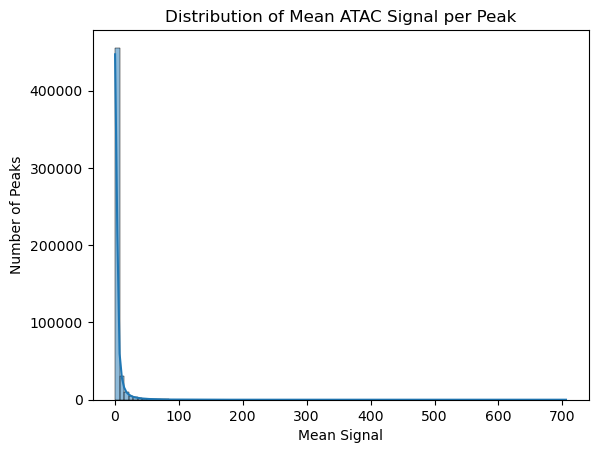

In [35]:
sns.histplot(peak_stats_df["Mean"], bins = 100, kde = True)
plt.title("Distribution of Mean ATAC Signal per Peak")
plt.xlabel("Mean Signal")
plt.ylabel("Number of Peaks")
plt.show()

Text(0.5, 1.0, 'Distribution of Coefficient of Variation (CV) per Peak')

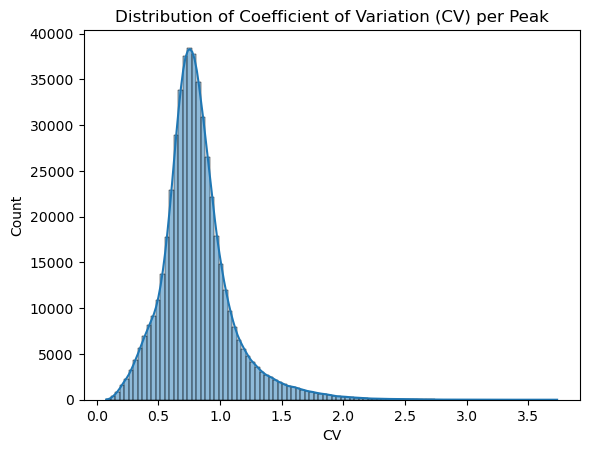

In [37]:
sns.histplot(peak_stats_df["CV"], bins=100, kde=True)
plt.title("Distribution of Coefficient of Variation (CV) per Peak")